#Project1 - Recommendation Systems | R5

- Problem Statement
Build your own recommendation system for products on an e-commerce website like Amazon.com.

- Dataset Link - https://drive.google.com/file/d/1ClBptsK3V5KgKXtK2GSRzFNAW7GnTPDW/view?usp=sharing

- Dataset - ratings_Electronics.csv
 
- Dataset columns - first three columns are userId, productId, and ratings and the fourth column is timestamp. You can discard the timestamp column as in this case you may not need to use it.

- Source - Amazon Reviews data (http://jmcauley.ucsd.edu/data/amazon/)  The repository has several datasets. For this case study, we are using the Electronics dataset.


###Please do the analysis based on steps( 1 to 8) as given below - 

###Steps -

1. Read and explore the given dataset.  ( Rename column/add headers, plot histograms, find data characteristics)
2. Take a subset of the dataset to make it less sparse/ denser. ( For example, keep the users only who has given 50 or more number of ratings )
3. Split the data randomly into train and test dataset. ( For example, split it in 70/30 ratio)
4. Build Popularity Recommender model.
5. Build Collaborative Filtering model.
6. Evaluate both the models. ( Once the model is trained on the training data, it can be used to compute the error (like RMSE) on predictions made on the test data.) You can also use a different method to evaluate the models.
7. Get top - K ( K = 5) recommendations. Since our goal is to recommend new products to each user based on his/her habits, we will recommend 5 new products.
8. Summarise your insights.
 
## Please Note - 

If you are facing any memory issue while working on this project, create a small subset (Let’s say 10% of data) and work on it.
If you are stuck at the model evaluation part of this project.

# Please refer to below links - 

- https://surprise.readthedocs.io/en/stable/accuracy.html
- http://surpriselib.com/ - Getting started, example

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

####1. Read and explore the given dataset.  ( Rename column/add headers, plot histograms, find data characteristics)

In [0]:
# Load the dataset from csv file & Define the columns
ratings_df = pd.read_csv('/content/drive/My Drive/Great_Lakes_Assignments/07_Recommendation_Systems_R5_Project1/ratings_Electronics.csv', error_bad_lines=False,
                         header = None, names= ['userId','productId','ratings','timestamp'])

In [5]:
# Visualize the data by getting the top 5 rows
ratings_df.head()

,userId,productId,ratings,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [6]:
# Explore the datatypes and shape of the dataset
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
userId       object
productId    object
ratings      float64
timestamp    int64
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


In [7]:
ratings_df.shape

(7824482, 4)

In [8]:
ratings_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ratings,7824482.0,4.012337e+00,1.380910e+00,1.0,3.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
timestamp,7824482.0,1.338178e+09,6.900426e+07,912729600.0,1.315354e+09,1.361059e+09,1.386115e+09,1.406074e+09


In [0]:
ratings_df.drop(columns='timestamp', axis = 1, inplace=True)

In [10]:
ratings_df.head()

,userId,productId,ratings
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0


In [11]:
# Fetting idea of unique values in our dataset 
for i  in ratings_df.columns:
    print ('Unique vlaues present in {} are : '.format(i),(ratings_df[i].nunique()))

('Unique vlaues present in userId are : ', 4201696)
('Unique vlaues present in productId are : ', 476002)
('Unique vlaues present in ratings are : ', 5)


In [12]:
# counting frequency 
frequency = []
for i in ratings_df.columns:
    print ('count for column {} is  = \n'.format(i) ,ratings_df[i].value_counts())
    frequency.append(ratings_df[i].value_counts().argmax())
frequency

('count for column userId is  = \n', A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
A1ODOGXEYECQQ8    380
A36K2N527TXXJN    314
A2AY4YUOX2N1BQ    311
AWPODHOB4GFWL     308
A25C2M3QF9G7OQ    296
ARBKYIVNYWK3C     296
A22CW0ZHY3NJH8    292
A38RMU1Y5TDP9     282
A3EXWV8FNSSFL6    282
A3LGT6UZL99IW1    279
A2NOW4U7W3F7RI    277
A23GFTVIETX7DS    270
A3PD8JD9L4WEII    266
A17BUUBOU0598B    261
A3AYSYSLHU26U9    257
A2XRMQA6PJ5ZJ8    253
A12DQZKRKTNF5E    252
A231WM2Z2JL0U3    252
A1UQBFCERIP7VJ    247
AGVWTYW0ULXHT     244
A203OCQQ12MAVT    240
AEJAGHLC675A7     239
A2NYK9KWFMJV4Y    238
A3A4ZAIBQWKOZS    236
A31N0XY2UTB25C    227
                 ... 
A3IQDDIKGZ5CN2      1
A3NAGC4U7X4ZTG      1
A2JXD0YD9QET1E      1
ARL1NC2XVRVS2       1
A36GJZ6ANYX1VN      1
A15HXM4XQDFPMZ      1
A2USFV7F8V4WQ5      1
A1036DJHCCPO93      1
A3HWRNIUC7QNC4      1
A3SE2GJIDS1UGS      1
A2V4RIWVLVQAFY      1
A3ON227NBH1138      1
A177G65IW1W97T   

['A5JLAU2ARJ0BO', 'B0074BW614', 5.0]

In [13]:
# Checking for missing value
print ("Count of null values in each feature:\n", ratings_df.isna().sum())

('Count of null values in each feature:\n', userId       0
productId    0
ratings      0
dtype: int64)


There are no missing values in the dataset.

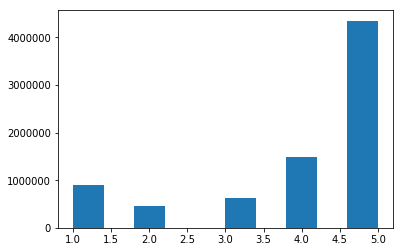

In [14]:
# Visualize the spread of ratings in the dataset
plt.hist(ratings_df['ratings']);


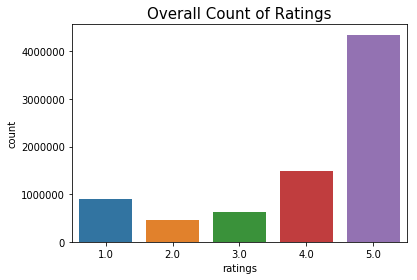

In [15]:
sns.countplot(data=ratings_df , x='ratings')
plt.title('Overall Count of Ratings', fontsize=15)
plt.show();

The more frequency is towards the high ratings. Ratings are not normally distributed.

In [16]:
# Get the mean ratings for each items and visualize
ratings_summary_df = pd.DataFrame()
ratings_summary_df['mean_ratings'] = ratings_df.groupby('productId')['ratings'].mean()
ratings_summary_df.head()

,mean_ratings
productId,
0132793040,5.000000
0321732944,5.000000
0439886341,1.666667
0511189877,4.500000
0528881469,2.851852


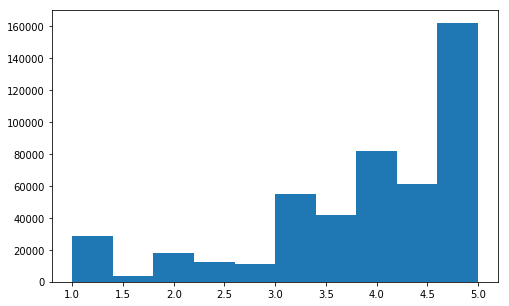

In [17]:
# Visualize the spread of ratings in the dataset
fig = plt.figure(figsize=(8 , 5))
plt.hist(ratings_summary_df.mean_ratings)
plt.xlabel = "Mean Ratings"
plt.ylabel = 'Frequency'
plt.show();

High frequency is towards high rating.

In [18]:
# Get the count of rating given by each users. This will help us to reduce the sparse data by 
# eliminating users who have not rated any items or less items
User_summary_df = pd.DataFrame()
User_summary_df['number_of_ratings'] = ratings_df.groupby('userId')['ratings'].count()
User_summary_df.head()

,number_of_ratings
userId,
A00000262KYZUE4J55XGL,1
A000063614T1OE0BUSKUT,2
A00009182QVLSWIGHLS1B,1
A00009661LC9LQPGKJ24G,1
A00010809P09NUU6ZP6H,1


In [19]:
User_summary_df['number_of_ratings'].unique()

array([  1,   2,   4,   3,   6,   7,   5,   8,  10,   9,  11,  12,  21,
        14,  19,  15,  13,  18,  17,  25, 116, 132,  20,  22,  16,  26,
        27,  24,  23,  32,  68,  71,  38,  36,  35,  30,  40,  34,  65,
        39,  33,  41,  31,  28,  57,  96,  80, 107,  46, 123,  77, 130,
        52,  29,  89,  37, 112,  67,  86,  66,  45,  75, 205,  58,  50,
       216,  43,  92,  54,  49,  64,  51, 252,  42,  72,  81,  44,  74,
        47,  53,  48,  62,  70, 104, 102,  60,  63, 157,  99,  56,  55,
        61, 261, 151,  94,  78, 119,  83,  73, 144, 177, 149, 106,  82,
        69, 108, 196,  76, 221, 197, 200, 155, 208, 207, 181, 160, 213,
        59, 103,  85,  98, 145, 218,  84, 101,  91, 100,  88, 114,  79,
        93, 131, 142, 380,  90,  95, 126, 110, 105,  97, 167, 227, 128,
       127, 247, 129, 220, 121,  87, 202, 109, 156, 111, 162, 240, 125,
       137, 150, 292, 270, 115, 226, 296, 311, 176, 170, 122, 117, 159,
       277, 238, 120, 253, 138, 171, 136, 314, 282, 236, 257, 20

(0, 10000)

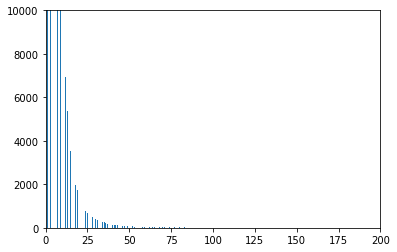

In [20]:
# Visualize the user ratings count.
plt.hist(User_summary_df.number_of_ratings, bins=2000)
plt.xlabel = 'Users: No. of scores'
plt.ylabel = 'Frequency'
plt.xlim(xmin=0, xmax = 200)
plt.ylim(ymin=0, ymax = 10000)

We have more users who have not rated any items or rated less items (< 50).

###Observations:
- We have large data (7824482 rows).
- UserID and itemID are alphanumeric. If needed we can convert it to category.
- We have more data with higher ratings.
- We have more users who have not rated any items or rated less items.

###2. Take a subset of the dataset to make it less sparse/ denser. ( For example, keep the users only who has given 50 or more number of ratings )

In [21]:
# Get the count of user who have rated more than 50 ratings
print (len(User_summary_df[User_summary_df.number_of_ratings >= 50]))
print (len(User_summary_df[User_summary_df.number_of_ratings < 50]))

1540
4200156


In [22]:
# Get the users who have rated >= 50 items.
Users_df = User_summary_df[User_summary_df.number_of_ratings >= 50]
Users_df.index

Index([u'A100UD67AHFODS', u'A100WO06OQR8BQ', u'A105S56ODHGJEK',
       u'A105TOJ6LTVMBG', u'A10AFVU66A79Y1', u'A10H24TDLK2VDP',
       u'A10NMELR4KX0J6', u'A10O7THJ2O20AG', u'A10PEXB6XAQ5XF',
       u'A10X9ME6R66JDX',
       ...
       u'AYOTEJ617O60K', u'AYP0YPLSP9ISM', u'AZ515FFZ7I2P7', u'AZ8XSDMIX04VJ',
       u'AZAC8O310IK4E', u'AZBXKUH4AIW3X', u'AZCE11PSTCH1L', u'AZMY6E8B52L2T',
       u'AZNUHQSHZHSUE', u'AZOK5STV85FBJ'],
      dtype='object', name=u'userId', length=1540)

In [23]:
# Have only users who have rated >=50 for our prediction and evaluation.
ratings_subset_df = ratings_df.loc[(ratings_df['userId'].isin(Users_df.index))]
ratings_subset_df.shape

(125871, 3)

We have created the subset of data to reduce the data by droping the users who have rated <50 items.

In [24]:
# random 8 samples
ratings_subset_df.sample(8)

,userId,productId,ratings
4439585,A3CKI6VEH0HBMJ,B004SP0NMI,5.0
2020868,APGQTZZ4ZFPHO,B001FW9QGQ,4.0
412416,A18EA7MNLXP9H5,B0001Y7UAI,5.0
5130645,A2H4OMJLE7JFM2,B005P99KX4,5.0
6823522,AGEWOMQ90BV8R,B00A47U22U,2.0
1568966,AGXV8E7XK9J6H,B00119T6NQ,4.0
266582,A11D1KHM7DVOQK,B000092YPR,4.0
3319357,AGILRZOT49R0V,B003ES5ZUU,5.0


In [25]:
# checking the unique entries
ratings_subset_df.nunique()

userId        1540
productId    48190
ratings          5
dtype: int64

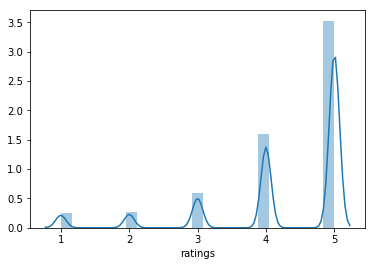

In [26]:
sns.distplot(ratings_subset_df['ratings'], bins=25);

In [27]:
# checking randomly per user records
ratings_subset_df[ratings_subset_df['userId'] == 'A1H4IVXNXWWBLV'].shape

(85, 3)

###3. Split the data randomly into train and test dataset. ( For example, split it in 70/30 ratio)

In [28]:
# Lets split the data to Train, Test
train_data, test_data = train_test_split(ratings_subset_df, test_size = 0.30, random_state=10)
train_data.head()

,userId,productId,ratings
7760154,A2JKM8KF3296CW,B00HPM1G8Q,5.0
4898726,A2MSBIA18RXYQC,B005F5II1I,2.0
2725558,AGYH5U11ZKPFB,B002MZUNXU,5.0
3600596,A6FIAB28IS79,B003VAHYXW,4.0
3084188,A3IJ4Z18FTIIP,B00365EVXI,1.0


In [29]:
train_data.shape

(88109, 3)

In [30]:
test_data.shape

(37762, 3)

###4. Build Popularity Recommender model.

In [31]:
ratings_subset_df.columns

Index([u'userId', u'productId', u'ratings'], dtype='object')

In [32]:
popular_by_mean_rating = ratings_subset_df.groupby('productId')['ratings'].mean()
popular_by_mean_rating.head()

productId
0594451647    5.000000
0594481813    3.000000
0970407998    2.500000
0972683275    4.750000
1400501466    3.333333
Name: ratings, dtype: float64

In [33]:
popular_by_mean_rating.sort_values(ascending=False).head()

productId
B00LKG1MC8    5.0
B002QUZM3M    5.0
B002QWNZHU    5.0
B002QXZPFE    5.0
B002R0DWNS    5.0
Name: ratings, dtype: float64

In [34]:
popular_by_rating_count = ratings_subset_df.groupby('productId')['ratings'].count()
popular_by_rating_count.head()

productId
0594451647    1
0594481813    1
0970407998    2
0972683275    4
1400501466    6
Name: ratings, dtype: int64

In [35]:
# Top 5 popular products
popular_by_rating_count.sort_values(ascending=False).head()

productId
B0088CJT4U    206
B003ES5ZUU    184
B000N99BBC    167
B007WTAJTO    164
B00829TIEK    149
Name: ratings, dtype: int64

In [0]:
ratings_mean_count = pd.DataFrame(popular_by_mean_rating)
ratings_mean_count['rating_counts'] = pd.DataFrame(popular_by_rating_count)  

In [37]:
ratings_mean_count.sample(5)

,ratings,rating_counts
productId,,
B006B7R9TG,1.000000,1
B000068RUF,5.000000,1
B0031CS83U,4.666667,3
B004H1R7KY,5.000000,1
B00D130648,4.000000,2


In [38]:
# Top 5 popular products 
ratings_mean_count['rating_counts'].sort_values(ascending=False).head()

productId
B0088CJT4U    206
B003ES5ZUU    184
B000N99BBC    167
B007WTAJTO    164
B00829TIEK    149
Name: rating_counts, dtype: int64

In [39]:
# Top 5 recommendations based on popularity
ratings_mean_count.sort_values('rating_counts', ascending=False).head()

,ratings,rating_counts
productId,,
B0088CJT4U,4.218447,206
B003ES5ZUU,4.864130,184
B000N99BBC,4.772455,167
B007WTAJTO,4.701220,164
B00829TIEK,4.436242,149


In [0]:
ratings_mean_count["rank"] = ratings_mean_count["rating_counts"].rank(ascending=False) 

In [41]:
ratings_mean_count.sort_values('rank').head()

,ratings,rating_counts,rank
productId,,,
B0088CJT4U,4.218447,206,1.0
B003ES5ZUU,4.864130,184,2.0
B000N99BBC,4.772455,167,3.0
B007WTAJTO,4.701220,164,4.0
B00829TIEK,4.436242,149,5.0


In [0]:
def recommend_popular_product(df, popularity_col, popularity_based_on, number_of_recommendation, type_of_recommendation = True):
    '''
    This method provides the popularity/least popular products
    parameter description:
    df = Dataframe which you want to use.
    popularity_col
    popularity_based_on
    number_of_recommendation = total number of recommendation
    type_of_recommendation: if true, most popular products, else least popular 
    '''
    ratings_sorted = pd.DataFrame(df.groupby(popularity_col)[popularity_based_on].mean())
    ratings_sorted['score'] = pd.DataFrame(df.groupby(popularity_col)[popularity_based_on].count())
    ratings_sorted['rank'] = ratings_sorted['score'].rank(ascending=False)
    return ratings_sorted.sort_values('rank', ascending=type_of_recommendation).head(number_of_recommendation)


In [43]:
# Most popular 5 product
recommend_popular_product(ratings_subset_df, 'productId', 'ratings', 5)

,ratings,score,rank
productId,,,
B0088CJT4U,4.218447,206,1.0
B003ES5ZUU,4.864130,184,2.0
B000N99BBC,4.772455,167,3.0
B007WTAJTO,4.701220,164,4.0
B00829TIEK,4.436242,149,5.0


In [44]:
# Least popular 5 product
recommend_popular_product(ratings_subset_df, 'productId', 'ratings', 5, False)

,ratings,score,rank
productId,,,
0594451647,5.0,1,32773.0
B0049XR5MK,5.0,1,32773.0
B004A9DHMK,4.0,1,32773.0
B004AAPKTW,5.0,1,32773.0
B004AAZXQM,4.0,1,32773.0


###5. Build Collaborative Filtering model.


###Surprise toolkit is used for Collaborative Filtering model.

In [0]:
#!pip install surprise

In [0]:
# Import all the necessary surprise toolkit modules...

from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

from surprise import KNNWithMeans
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import train_test_split


In [0]:
# Lets load the dataset as per the requirement for surprise module
reader = Reader(rating_scale = (1,5))
data = Dataset.load_from_df(ratings_subset_df, reader = reader)

In [0]:
# Lets split the train and test with surprise model functionality
trainset, testset = train_test_split(data, test_size=.3)

In [55]:
# Lets go with KNN algorithm
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})

# Train the model with train dataset
algo.fit(data.build_full_trainset())

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [0]:
# This function gives the top N predictions for the users based on collaborative filtering model.
def predictItem(uid, N=10):
    #Get the list of item id's already rated by the user.
    iidUsr = ratings_subset_df.loc[ratings_subset_df['userId'] == uid, 'productId']
    #Remove the item id's already rated by the user
    itemIDs = ratings_subset_df['productId'].unique()
    iids_to_pred = np.setdiff1d(itemIDs,iidUsr)
    testpredict = [[uid, iid, 4.] for iid in iids_to_pred]
    pred = algo.test(testpredict)
    pred_df = pd.DataFrame(pred)
    SortedPred = pd.DataFrame()
    SortedPred['iid'] = pred_df['iid']
    SortedPred['est'] = pred_df['est']
    SortedPred.sort_values(by = 'est', inplace= True, ascending=False)
    print ("Top {} item predictions for the user {}:".format(N, uid) )
    print (SortedPred.head(N))

In [67]:
#Lets predict top 5 recommendation for some user
predictItem('AGYH5U11ZKPFB', 5)

Top 5 item predictions for the user AGYH5U11ZKPFB:
              iid  est
16761  B001FA09ZA  5.0
24770  B003ELYQGG  5.0
33896  B005J5TZQ6  5.0
5291   B0002KR3X0  5.0
26116  B003TOE4PQ  5.0


In [0]:
train_users = train_data['userId'].unique()

In [72]:
#Lets predict top 5 recommendation for some user based on userId
predictItem(train_users[111], 5)

Top 5 item predictions for the user A18EA7MNLXP9H5:
              iid  est
4176   B000144I2Q  5.0
20872  B002IOT5PW  5.0
27650  B0043M668G  5.0
32680  B0057X4TWA  5.0
8564   B000ETVKHE  5.0


In [73]:
#To get the item specific rating for a user
algo.predict('A2NYOY6H42SORF', 'B003XIM3QK', r_ui=4, verbose=True)

user: A2NYOY6H42SORF item: B003XIM3QK r_ui = 4.00   est = 2.00   {u'actual_k': 1, u'was_impossible': False}


Prediction(uid=u'A2NYOY6H42SORF', iid=u'B003XIM3QK', r_ui=4, est=2.0, details={u'actual_k': 1, u'was_impossible': False})

## Different recommendations are given for different users, as Collaborative Filtering model is based on user preferrences unlike Popularity Model.

###6. Evaluate both the models. ( Once the model is trained on the training data, it can be used to compute the error (like RMSE) on predictions made on the test data.) You can also use a different method to evaluate the models.


In [74]:
# Evaluation for Collaborative Filtering Model.

# Lets predict for test data and get the RMSE for the prediction.
predictions = algo.test(testset)                                           
print ("Collaborative Model RMSE: ", accuracy.rmse(predictions))

RMSE: 0.0335
Collaborative Model RMSE:  0.03350245481838074


###Observations

- As Collaborative model is based on user/item charecteristics, it will be more accurate than Popularity Model.

###7. Get top - K ( K = 5) recommendations. Since our goal is to recommend new products to each user based on his/her habits, we will recommend 5 new products.


In [0]:
# Get unique users in the dataset.
Users = ratings_subset_df['userId'].unique()

In [76]:
# Top 5 recommendation using Popularity Model
recommend_popular_product(ratings_subset_df, 'productId', 'ratings', 5)

,ratings,score,rank
productId,,,
B0088CJT4U,4.218447,206,1.0
B003ES5ZUU,4.864130,184,2.0
B000N99BBC,4.772455,167,3.0
B007WTAJTO,4.701220,164,4.0
B00829TIEK,4.436242,149,5.0


In [77]:
# Top 5 recommendation using Collaborative Filtering Model
predictItem(Users[120], 5)

Top 5 item predictions for the user A3J8A5L5AF5TX9:
              iid  est
27183  B0041DMFKA  5.0
23963  B00390JT1O  5.0
26967  B003ZWQXUQ  5.0
40033  B008VEFFI4  5.0
38898  B0089KJSKQ  5.0


###8. Summary

- 1 Popularity Model gives similar recommendation to all users.It is based on popularity of the items rather than user specific.
- 2 Collaborative Model gives user specific recommendations as it considers user/item characteristics to recommend similar products.
- 3 So Collaborative Filtering model will give precise recommendation than Popularity Model.